✅ Accuracy: 0.722
✅ AUC: 0.766
✅ Confusion Matrix:
[[356  22]
 [134  49]]


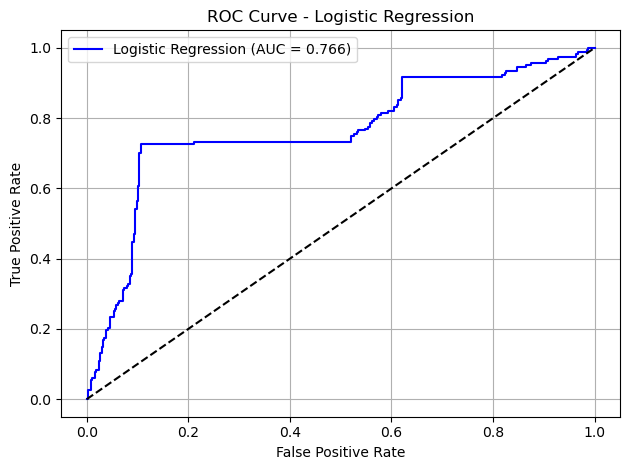

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_excel("CACS_dataset_with_binary.xlsx")

# 2. Encode 'sex' (M=1, F=0)
df["sex"] = df["sex"].map({"M": 1, "F": 0})

# 3. Feature/Target split
X = df.drop(columns=["id", "name", "birth", "CACS", "CACS_binary"])
y = df["CACS_binary"]

# 4. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 5. Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print(f"✅ Accuracy: {accuracy:.3f}")
print(f"✅ AUC: {auc:.3f}")
print(f"✅ Confusion Matrix:\n{cm}")

# 7. ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.3f})", color="blue")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
